In [ ]:
# Libraries Import
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
from textblob import TextBlob
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
import itertools
import re
import string
import glob
import emoji
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [57]:
# Dataset convert to dataframe
df = []
# get karachi tweets
karachi_df = pd.read_csv('Scrapped Files/Karachi.csv')
#karachi1 = pd.read_csv('/kaggle/input/pakistan-tweets-mail/Karachi_visit_tweets.csv')

# concatenate karachi tweets
#karachi_df = pd.concat([karachi, karachi1], ignore_index=True)
karachi_df['city'] = 'Karachi'

# get lahore tweets
lahore_df = pd.read_csv("Scrapped Files/Lahroe.csv")
#lahore1 = pd.read_csv('/kaggle/input/pakistan-tweets-mail/visit_lahore_tweets converted.csv')

# concatenate lahore tweets
#lahore_df = pd.concat([lahore, lahore1], ignore_index=True)
lahore_df['city'] = 'Lahore'

# get gilgit tweets
#gilgit = pd.read_csv('/kaggle/input/pakistan-tweets-mail/Gilgit_tweets.csv')
#gilgit['city'] = 'gilgit'

# get neelum valley tweets
#neelum_valley = pd.read_csv('/kaggle/input/pakistan-tweets-mail/NeelumValley_tweets.csv')
#neelum_valley['city'] = 'neelum_valley'

# get northern tweets
#northern = pd.read_csv('../input/tweets/Pakistan_north_tweets.csv')
#northern1 = pd.read_csv('../input/tweets/Pakistan_northern_tweets.csv')

# concatenate northern tweets
#northern_df = pd.concat([northern, northern1], ignore_index=True)
#northern_df['city'] = 'northern area'

# # Concatenate all data into one DataFrame
#df = pd.concat([karachi_df, lahore_df, gilgit, neelum_valley, northern_df], ignore_index=True)

hunza_df = pd.read_csv("Scrapped Files/Hunza.csv")
hunza_df['city'] = 'Hunza'

islamabad_df = pd.read_csv("Scrapped Files/Islamabad.csv")
islamabad_df['city'] = 'Islamabad'

kaghan_df = pd.read_csv("Scrapped Files/Kaghan.csv")
kaghan_df['city'] = 'Kaghan'

neelum_df = pd.read_csv("Scrapped Files/NeelumValley.csv")
neelum_df['city'] = 'Neelum Valley'

peshawar_df = pd.read_csv("Scrapped Files/Peshawar.csv")
peshawar_df['city'] = 'Peshawar'

skardu_df = pd.read_csv("Scrapped Files/SkarduValley.csv")
skardu_df['city'] = 'Skardu'

swaat_df = pd.read_csv("Scrapped Files/Swat.csv")
swaat_df['city'] = 'Swaat'

# df = pd.concat([lahore_df], ignore_index=True)
df = pd.concat([karachi_df, lahore_df, hunza_df, islamabad_df, kaghan_df, neelum_df, peshawar_df, skardu_df, swaat_df], ignore_index=True)
df.head()

,UserName,Handle,Timestamp,Text,Comment,Responding,Reply,Likes,Retweets,city
0,Salaam Estate & Builders,@EstateSalaam,2022-12-24T19:19:40.000Z,Salaam Estate & Builders\n@EstateSalaam\n·\n1m...,Salaam Estate & Builders\n@EstateSalaam\n·\n1m,#NewYearCelebrations #NewYearEve #NewYear2023 ...,NaN,NaN,NaN,Karachi
1,DreamsNex Marketing,@DreamsNexMKT,2022-12-24T19:19:05.000Z,DreamsNex Marketing\n@DreamsNexMKT\n·\n1m#NewY...,DreamsNex Marketing\n@DreamsNexMKT\n·\n1m,#NewYearCelebrations #NewYearEve #NewYear2023 ...,NaN,NaN,NaN,Karachi
2,DreamsNex Marketing,@DreamsNexMKT,2022-12-24T19:19:00.000Z,DreamsNex Marketing\n@DreamsNexMKT\n·\n2mThere...,DreamsNex Marketing\n@DreamsNexMKT\n·\n2m,There is no power on earth that can undo Pakis...,NaN,NaN,NaN,Karachi
3,DreamsNex,@DreamsNex,2022-12-24T19:19:00.000Z,DreamsNex\n@DreamsNex\n·\n2mThere is no power ...,DreamsNex\n@DreamsNex\n·\n2m,There is no power on earth that can undo Pakis...,NaN,NaN,NaN,Karachi
4,VENUS CORPORATION,@VENUSPAKISTAN,2022-12-24T19:18:24.000Z,VENUS CORPORATION\n@VENUSPAKISTAN\n·\n2mWe wan...,VENUS CORPORATION\n@VENUSPAKISTAN\n·\n2m,We want to buy\n\nCalcium Nitrate\n\nCas 13477...,NaN,NaN,NaN,Karachi


In [58]:
# cleaning text function
def clean_text(text,replace=''):
    lemmatizer = WordNetLemmatizer() 
    stop_words = set(stopwords.words('english'))
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    
    text = re.sub(r'\d+', '', str(text))
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = "".join(i for i in text if ord(i) < 128) # remove non-ascii characters
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove punctuation characters
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', replace, text) # removes URL from string
    text = emoji.demojize(text) # remove emojies
    # remove stop words andapplying Lemmatization
    text = ' '.join(lemmatizer.lemmatize(word, pos ="a") for word in text.split() if word not in stop_words) 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    return text

In [ ]:
# Library download
# Not run
nltk.download('punkt')

In [59]:
###################################################################################### Cleaning Text #################################################################
#df = df.drop(['hashtags', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
#df = df.drop(['hashtags'], axis=1)
df = df.drop(['UserName', 'Handle', 'Timestamp', 'Text', 'Comment', 'Reply', 'Reply', 'Likes', 'Retweets'], axis=1)

df['Responding'] = df['Responding'].apply(clean_text)
df['Responding'].replace('nan', np.nan, inplace=True)
df['Responding'].replace('', np.nan, inplace=True)
df = df.dropna()
df.reset_index(inplace = True, drop = True)
df.head()

,Responding,city
0,newyearcelebrations newyeareve newyear firewor...,Karachi
1,newyearcelebrations newyeareve newyear firewor...,Karachi
2,power earth undo pakistan quaideazam muhammad ...,Karachi
3,power earth undo pakistan quaideazam muhammad ...,Karachi
4,want buycalcium nitratecas cfr karachi pakista...,Karachi


In [50]:
# Save to combined file
df.to_csv('Combined_Converted.csv', index=False)

In [2]:
# Load from combined file
df = pd.read_csv('Combined_Converted.csv')
df.head()

,Responding,city
0,newyearcelebrations newyeareve newyear firewor...,Karachi
1,newyearcelebrations newyeareve newyear firewor...,Karachi
2,power earth undo pakistan quaideazam muhammad ...,Karachi
3,power earth undo pakistan quaideazam muhammad ...,Karachi
4,want buycalcium nitratecas cfr karachi pakista...,Karachi


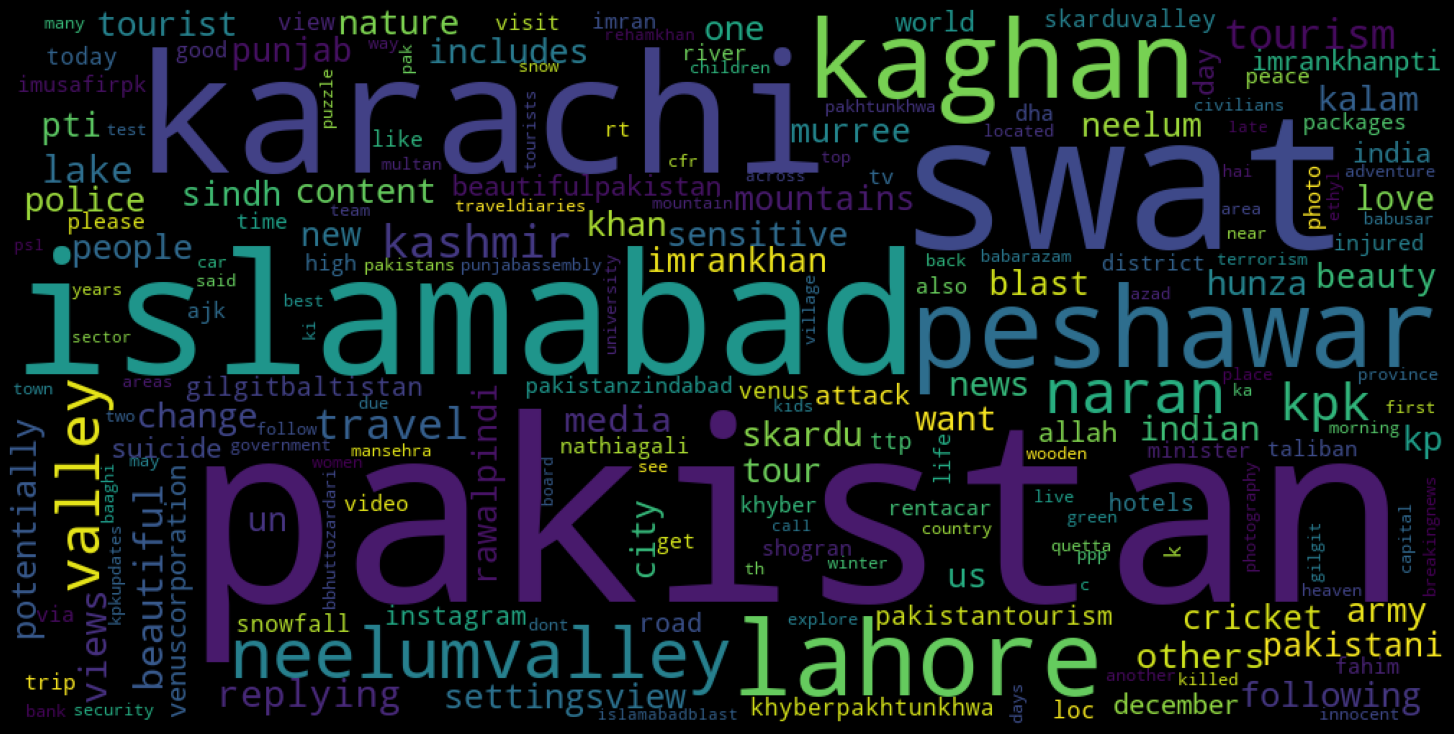

In [3]:
# Word Cloud
tweet = ' '.join(df["Responding"])
#function to split text into word
tokens = word_tokenize(tweet)
vocabulary = set(tokens)
frequency_dist = nltk.FreqDist(tokens)

wordcloud = WordCloud(width=1000, height=500).generate_from_frequencies(frequency_dist)
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [4]:
# Gave polarity label to dataset
polarity_score = []

for text in df['Responding']:    
    blob = TextBlob(text)
    for sentence in blob.sentences:
        if sentence.sentiment.polarity > 0.0:
            polarity_score.append('positive')
        elif sentence.sentiment.polarity < 0.0:
            polarity_score.append('negative')
        else:
            polarity_score.append('neutral')

df['target'] = pd.DataFrame(polarity_score)
df.head()

,Responding,city,target
0,newyearcelebrations newyeareve newyear firewor...,Karachi,neutral
1,newyearcelebrations newyeareve newyear firewor...,Karachi,neutral
2,power earth undo pakistan quaideazam muhammad ...,Karachi,neutral
3,power earth undo pakistan quaideazam muhammad ...,Karachi,neutral
4,want buycalcium nitratecas cfr karachi pakista...,Karachi,neutral


In [107]:
# Testing
df['Responding'][df['target'] == 'positive']

5        pso karachitrafficaccidentthe following media ...
10       muhammad ali jinnah sulraj estate quaideazam p...
11       httpssahafionline karachi anothercitizenkilled...
19       happybirthday murtazawahab stay blessed happy ...
24       congratulations mir hamza shanwaz dani sajid k...
                               ...                        
23800    primeministerimrankhan praised pakistans brave...
23804    replying umountaineer pakistanbikersexposure r...
23806    beautiful pakistan swat miandam khyber pakhtun...
23808    beautiful cold scenes shanglathis video brough...
23810    winter season full swing travel companies taki...
Name: Responding, Length: 6770, dtype: object

<AxesSubplot:>

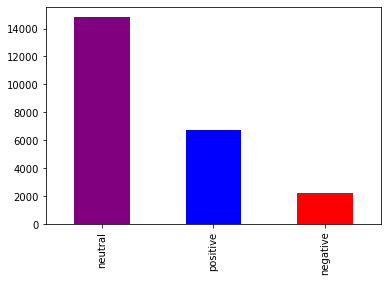

In [5]:
# Plot number of tags
df['target'].value_counts().plot.bar(color=['purple', 'blue', 'red'])

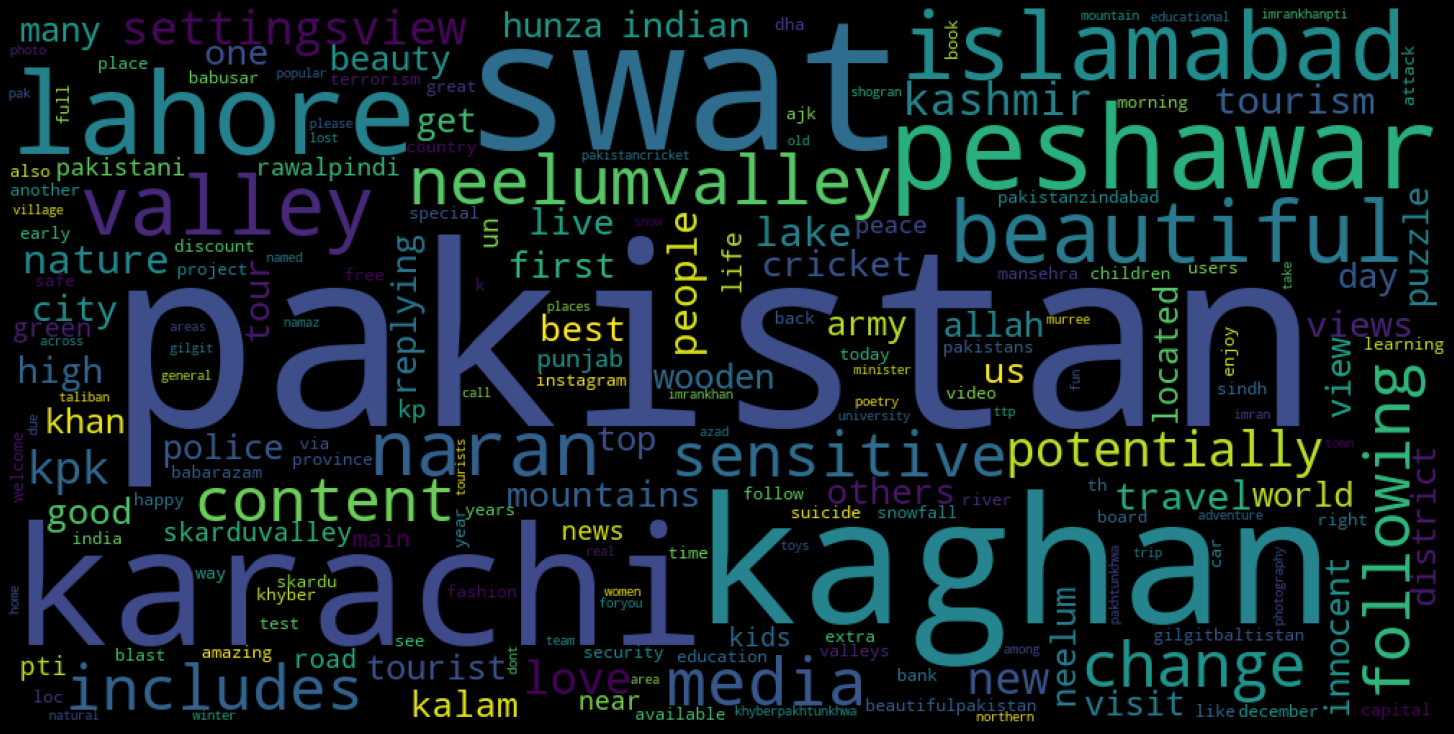

In [6]:
# POsitive tweets word cloud
tweet = ' '.join(df['Responding'][df['target'] == 'positive'] )
#function to split text into word
tokens = word_tokenize(tweet)
vocabulary = set(tokens)
frequency_dist = nltk.FreqDist(tokens)

wordcloud = WordCloud(width=1000, height=500).generate_from_frequencies(frequency_dist)
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

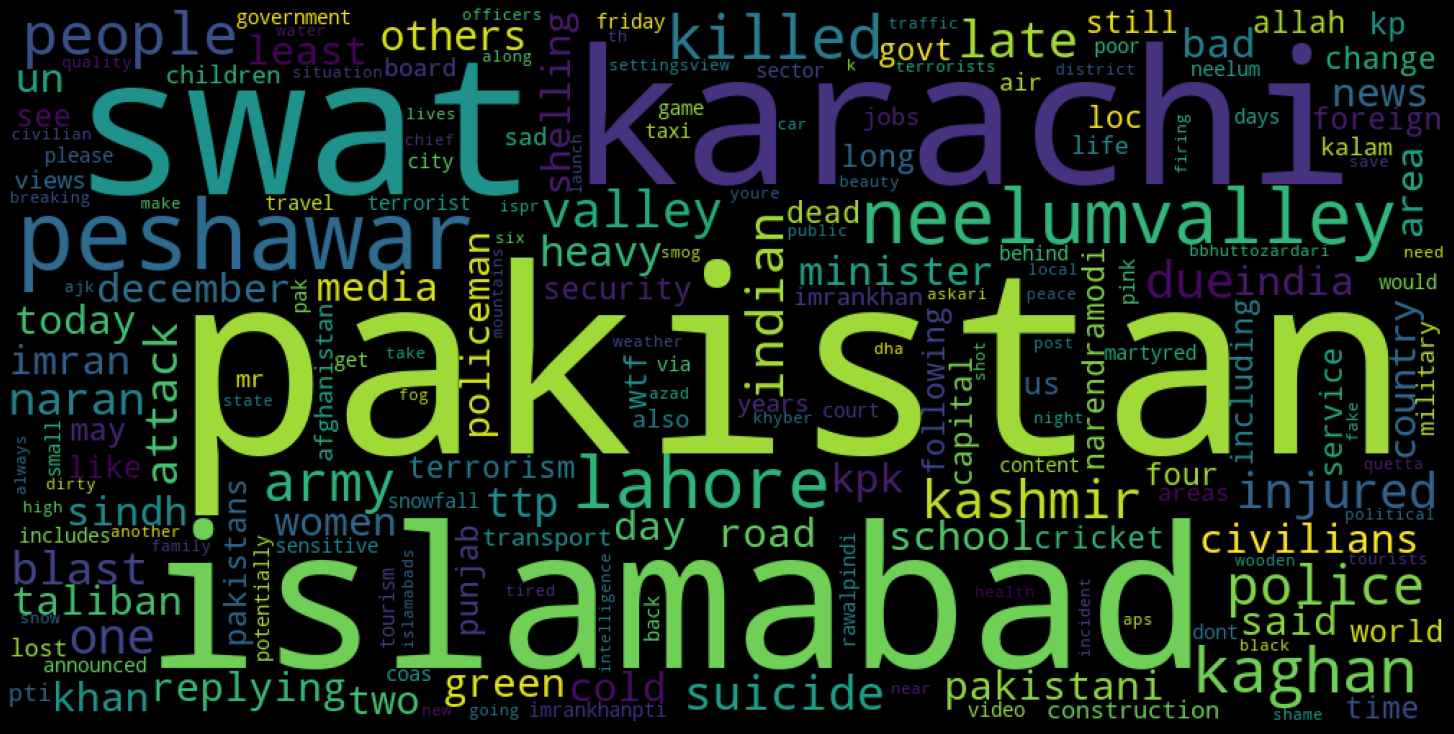

In [7]:
# Negative tweets word cloud
tweet = ' '.join(df['Responding'][df['target'] == 'negative'] )
#function to split text into word
tokens = word_tokenize(tweet)
vocabulary = set(tokens)
frequency_dist = nltk.FreqDist(tokens)

wordcloud = WordCloud(width=1000, height=500).generate_from_frequencies(frequency_dist)
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [8]:
# Change polarity to label
label = LabelEncoder()
df_ = df.copy()
df_['target'] = label.fit_transform(df_['target'])
# dummies = pd.get_dummies(df.target)
# df = pd.concat([df, dummies], axis=1)
df_.head()

,Responding,city,target
0,newyearcelebrations newyeareve newyear firewor...,Karachi,1
1,newyearcelebrations newyeareve newyear firewor...,Karachi,1
2,power earth undo pakistan quaideazam muhammad ...,Karachi,1
3,power earth undo pakistan quaideazam muhammad ...,Karachi,1
4,want buycalcium nitratecas cfr karachi pakista...,Karachi,1


In [123]:
# testing
df_['Responding'][df_['target'] == 2]

5        pso karachitrafficaccidentthe following media ...
10       muhammad ali jinnah sulraj estate quaideazam p...
11       httpssahafionline karachi anothercitizenkilled...
19       happybirthday murtazawahab stay blessed happy ...
24       congratulations mir hamza shanwaz dani sajid k...
                               ...                        
23800    primeministerimrankhan praised pakistans brave...
23804    replying umountaineer pakistanbikersexposure r...
23806    beautiful pakistan swat miandam khyber pakhtun...
23808    beautiful cold scenes shanglathis video brough...
23810    winter season full swing travel companies taki...
Name: Responding, Length: 6770, dtype: object

In [120]:
# Testing
df_['target'] == 0

0        False
1        False
2        False
3        False
4        False
         ...  
23809    False
23810    False
23811    False
23812    False
23813    False
Name: target, Length: 23814, dtype: bool

In [66]:
# testing
df['city'] == 'Karachi'

0         True
1         True
2         True
3         True
4         True
         ...  
23809    False
23810    False
23811    False
23812    False
23813    False
Name: city, Length: 23814, dtype: bool

In [9]:
##################################################### Train Test split Data set #############################################
#Seperate data into feature and results
X, y = df_['Responding'], df_['target']

#Split data in train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [10]:
# TEsting
X_train

9224     learning toys study book intellectual learning...
10857    others friends let make plan naran kaghan eidm...
6196                                             islamabad
21950    land history beyond numbers text spirituality ...
19091    peshawar ispr anupamkhermansoor soomromansoorm...
                               ...                        
13123    autumn kashmir beatuyofkashmir neelumtrekkersc...
19648                   ptilongmarchazamswatipeshawardgisi
9845     northern side pakistan islamabad naran kaghan ...
10799    devils love toyota bj babusar toppakistan babu...
2732     imagine life one leave home pave way foreigner...
Name: Responding, Length: 17860, dtype: object

In [10]:
#UNI-Gram TF-IDF Transformation
my_categories=['0','1','2']
tfidf_Uni = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 1))

# TF-IDF BASED FEATURE REPRESENTATION
tfidf_Uni.fit_transform(X_train)
        
train_feature_set_Uni=tfidf_Uni.transform(X_train)
test_feature_set_Uni=tfidf_Uni.transform(X_test)

In [41]:
# testomg
print(train_feature_set[2])

  (0, 6325)	1.0


In [11]:
# Instantiate the Logistic REgression model for Uni gram Tf Idf 
logreg_Uni = LogisticRegression(random_state=0)

logreg_Uni.fit(train_feature_set_Uni,y_train)

#
y_pred_logreg_Uni=logreg_Uni.predict(test_feature_set_Uni)
lrm1 = accuracy_score(y_pred_logreg_Uni, y_test)

print('accuracy %s' % lrm1)
print(classification_report(y_test, y_pred_logreg_Uni,target_names=my_categories))
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_logreg_Uni))

accuracy 0.8871346993617736
              precision    recall  f1-score   support

           0       0.90      0.45      0.60       550
           1       0.88      0.98      0.93      3697
           2       0.90      0.82      0.86      1707

    accuracy                           0.89      5954
   macro avg       0.90      0.75      0.80      5954
weighted avg       0.89      0.89      0.88      5954

Confusion Matrix 
 [[ 249  204   97]
 [   8 3637   52]
 [  19  292 1396]]


In [12]:
# Instantiate the Naive Bayes model for Uni gram Tf Idf
nb_Uni = MultinomialNB()

nb_Uni.fit(train_feature_set_Uni, y_train)

y_pred_nb_Uni = nb_Uni.predict(test_feature_set_Uni)
nb1 = accuracy_score(y_pred_nb_Uni, y_test)

print('accuracy %s' % nb1)
print(classification_report(y_test, y_pred_nb_Uni,target_names=my_categories))
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_nb_Uni))

accuracy 0.8249916022841787
              precision    recall  f1-score   support

           0       0.92      0.17      0.28       550
           1       0.84      0.96      0.89      3697
           2       0.79      0.74      0.76      1707

    accuracy                           0.82      5954
   macro avg       0.85      0.62      0.65      5954
weighted avg       0.83      0.82      0.80      5954

Confusion Matrix 
 [[  92  258  200]
 [   3 3559  135]
 [   5  441 1261]]


In [13]:
# Instantiate the Random Forest model for Uni gram Tf Idf  
rclf_Uni = RandomForestClassifier()
rclf_Uni.fit(train_feature_set_Uni,y_train)
y_pred_rclf_Uni = rclf_Uni.predict(test_feature_set_Uni)

print('accuracy %s' % accuracy_score(y_test,y_pred_rclf_Uni))
print(classification_report(y_test, y_pred_rclf_Uni,target_names=my_categories))
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_rclf_Uni))

accuracy 0.9151830702049043
              precision    recall  f1-score   support

           0       0.90      0.54      0.68       550
           1       0.92      0.99      0.95      3697
           2       0.91      0.87      0.89      1707

    accuracy                           0.92      5954
   macro avg       0.91      0.80      0.84      5954
weighted avg       0.91      0.92      0.91      5954

Confusion Matrix 
 [[ 299  136  115]
 [   5 3665   27]
 [  30  192 1485]]


In [14]:
# Instantiate the MLP model for Uni gram Tf Idf 
clf_Uni = MLPClassifier(hidden_layer_sizes=(50, 75, 60, 30,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', 
                    learning_rate_init=0.001, power_t=0.5, max_iter=50, shuffle=True, random_state=None, tol=0.0001, verbose=True, 
                    warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, 
                    beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000).fit(train_feature_set_Uni,y_train)

y_pred_clf_Uni = clf_Uni.predict(test_feature_set_Uni)
y_pred_clf_Uni_prob = clf_Uni.predict_proba(test_feature_set_Uni)
mlp1= accuracy_score(y_pred_clf_Uni, y_test)

print('accuracy %s' % mlp1)
print(classification_report(y_test, y_pred_clf_Uni,target_names=my_categories))
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_clf_Uni))

Iteration 1, loss = 0.91955890
Validation score: 0.795073
Iteration 2, loss = 0.34952784
Validation score: 0.880739
Iteration 3, loss = 0.08772935
Validation score: 0.901456
Iteration 4, loss = 0.01870636
Validation score: 0.899216
Iteration 5, loss = 0.00898273
Validation score: 0.900336
Iteration 6, loss = 0.00555971
Validation score: 0.897536
Iteration 7, loss = 0.00355215
Validation score: 0.899216
Iteration 8, loss = 0.00192609
Validation score: 0.899776
Iteration 9, loss = 0.00079829
Validation score: 0.900896
Iteration 10, loss = 0.00066147
Validation score: 0.901456
Iteration 11, loss = 0.00064010
Validation score: 0.898656
Iteration 12, loss = 0.00101404
Validation score: 0.902016
Iteration 13, loss = 0.00044723
Validation score: 0.899776
Iteration 14, loss = 0.00047909
Validation score: 0.901456
Iteration 15, loss = 0.00039198
Validation score: 0.901456
Iteration 16, loss = 0.00024754
Validation score: 0.902576
Iteration 17, loss = 0.00023054
Validation score: 0.903135
Iterat

In [16]:
# Testing
print(clf_Uni.get_params())
print(clf_Uni.classes_)
print(clf_Uni.loss_)
print(clf_Uni.n_features_in_)
print(clf_Uni.n_layers_)
print(clf_Uni.n_outputs_)
print(clf_Uni.out_activation_)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (50, 75, 60, 30), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 50, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': True, 'warm_start': False}
[0 1 2]
0.00017240235780421006
14689
6
3
softmax


In [19]:
# MLP Classification Scores
y_pred_mlp = clf_Uni.predict(test_feature_set_Uni)
y_pred_mlp_prob = clf_Uni.predict_proba(test_feature_set_Uni)
mlp1= accuracy_score(y_pred_mlp, y_test)

print('accuracy %s' % mlp1)
print(classification_report(y_test, y_pred_mlp,target_names=my_categories))
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_mlp))

accuracy 0.8993953644608667
              precision    recall  f1-score   support

           0       0.77      0.61      0.68       550
           1       0.93      0.96      0.94      3697
           2       0.87      0.87      0.87      1707

    accuracy                           0.90      5954
   macro avg       0.86      0.81      0.83      5954
weighted avg       0.90      0.90      0.90      5954

Confusion Matrix 
 [[ 337  107  106]
 [  54 3533  110]
 [  48  174 1485]]


In [24]:
# Graphical Confusion Matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy 0.9390325831373866
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       550
           1       0.96      0.98      0.97      3697
           2       0.92      0.92      0.92      1707

    accuracy                           0.94      5954
   macro avg       0.90      0.88      0.89      5954
weighted avg       0.94      0.94      0.94      5954

Confusion Matrix 
 [[ 403   62   85]
 [  36 3618   43]
 [  49   88 1570]]
Confusion matrix, without normalization


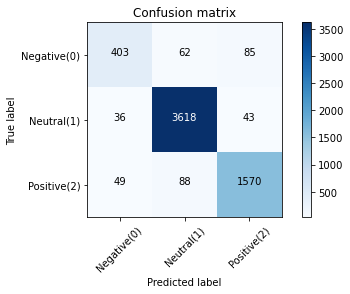

In [30]:
# Instantiate the Ensemble model for Uni gram Tf Idf 
classes = ['Negative(0)','Neutral(1)','Positive(2)']
estimators = [
    ('lr_clf', LogisticRegression(random_state=0)),
    ('nb_clf', MultinomialNB()),
    ('rf_clf', RandomForestClassifier(random_state=0)),
    ('mlp_clf',MLPClassifier(hidden_layer_sizes=(50, 75, 60, 30,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', 
                    learning_rate_init=0.001, power_t=0.5, max_iter=50, shuffle=True, random_state=None, tol=0.0001, verbose=True, 
                    warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, 
                    beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000))
]

# Stacking Classifier scikit-learn
stack_clf_Uni = StackingClassifier(estimators=estimators,final_estimator=RandomForestClassifier(random_state=0),
                               verbose=True, n_jobs=-1)
stack_clf_Uni.fit(train_feature_set_Uni, y_train)

stack_clf_pred_Uni = stack_clf_Uni.predict(test_feature_set_Uni)

stack_clf_acc_Uni = accuracy_score(stack_clf_pred_Uni, y_test)

print('accuracy %s' % stack_clf_acc_Uni)
print(classification_report(y_test, stack_clf_pred_Uni,target_names=my_categories))
print('Confusion Matrix \n',confusion_matrix(y_test,stack_clf_pred_Uni))


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, stack_clf_pred_Uni, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes
                      ,normalize= False,  title='Confusion matrix')

In [31]:
# Bi-Gram TF-IDF Transforamtion
tfidf_Bi = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))

# TF-IDF BASED FEATURE REPRESENTATION
tfidf_Bi.fit_transform(X_train)
        
train_feature_set_Bi=tfidf_Bi.transform(X_train)
test_feature_set_Bi=tfidf_Bi.transform(X_test)

In [32]:
# Instantiate the Logistic Regression model for Bi gram Tf Idf
logreg_Bi = LogisticRegression(random_state=0)

logreg_Bi.fit(train_feature_set_Bi,y_train)

#
y_pred_logreg_Bi=logreg_Bi.predict(test_feature_set_Bi)
lrm1 = accuracy_score(y_pred_logreg_Bi, y_test)

print('accuracy %s' % lrm1)
print(classification_report(y_test, y_pred_logreg_Bi,target_names=my_categories))
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_logreg_Bi))

accuracy 0.8789049378569029
              precision    recall  f1-score   support

           0       0.90      0.44      0.59       550
           1       0.87      0.98      0.92      3697
           2       0.90      0.80      0.85      1707

    accuracy                           0.88      5954
   macro avg       0.89      0.74      0.79      5954
weighted avg       0.88      0.88      0.87      5954

Confusion Matrix 
 [[ 241  213   96]
 [   9 3628   60]
 [  19  324 1364]]


In [34]:
# Instantiate the Naive Bayes model for Bi gram Tf Idf 
nb_Bi = MultinomialNB()

nb_Bi.fit(train_feature_set_Bi, y_train)

y_pred_nb_Bi = nb_Bi.predict(test_feature_set_Bi)
nb1 = accuracy_score(y_pred_nb_Bi, y_test)

print('accuracy %s' % nb1)
print(classification_report(y_test, y_pred_nb_Bi,target_names=my_categories))
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_nb_Bi))

accuracy 0.8113873026536782
              precision    recall  f1-score   support

           0       0.97      0.16      0.27       550
           1       0.80      0.98      0.88      3697
           2       0.83      0.66      0.74      1707

    accuracy                           0.81      5954
   macro avg       0.87      0.60      0.63      5954
weighted avg       0.83      0.81      0.78      5954

Confusion Matrix 
 [[  86  313  151]
 [   1 3612   84]
 [   2  572 1133]]


In [35]:
# Instantiate the Random Forest Classifier model for Bi gram Tf Idf 
rclf_Bi = RandomForestClassifier()
rclf_Bi.fit(train_feature_set_Bi,y_train)
y_pred_rclf_Bi = rclf_Bi.predict(test_feature_set_Bi)

print('accuracy %s' % accuracy_score(y_test,y_pred_rclf_Bi))
print(classification_report(y_test, y_pred_rclf_Bi,target_names=my_categories))
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_rclf_Bi))

accuracy 0.913503527040645
              precision    recall  f1-score   support

           0       0.91      0.53      0.67       550
           1       0.91      0.99      0.95      3697
           2       0.92      0.87      0.89      1707

    accuracy                           0.91      5954
   macro avg       0.91      0.80      0.84      5954
weighted avg       0.91      0.91      0.91      5954

Confusion Matrix 
 [[ 291  155  104]
 [   6 3669   22]
 [  23  205 1479]]


In [36]:
# Instantiate the MLP model for Bi gram Tf Idf 
clf_Bi = MLPClassifier(hidden_layer_sizes=(50, 75, 60, 30,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', 
                    learning_rate_init=0.001, power_t=0.5, max_iter=50, shuffle=True, random_state=None, tol=0.0001, verbose=True, 
                    warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, 
                    beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000).fit(train_feature_set_Bi,y_train)

y_pred_clf_Bi = clf_Bi.predict(test_feature_set_Bi)
y_pred_clf_Bi_prob = clf_Bi.predict_proba(test_feature_set_Bi)
mlp1= accuracy_score(y_pred_clf_Bi, y_test)

print('accuracy %s' % mlp1)
print(classification_report(y_test, y_pred_clf_Bi,target_names=my_categories))
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_clf_Bi))

Iteration 1, loss = 0.80972824
Validation score: 0.791713
Iteration 2, loss = 0.32629988
Validation score: 0.861142
Iteration 3, loss = 0.08017854
Validation score: 0.866181
Iteration 4, loss = 0.01963952
Validation score: 0.871781
Iteration 5, loss = 0.01100139
Validation score: 0.875140
Iteration 6, loss = 0.00566279
Validation score: 0.877940
Iteration 7, loss = 0.00377416
Validation score: 0.875140
Iteration 8, loss = 0.00302575
Validation score: 0.877380
Iteration 9, loss = 0.00278190
Validation score: 0.876260
Iteration 10, loss = 0.00162694
Validation score: 0.878499
Iteration 11, loss = 0.00087538
Validation score: 0.881859
Iteration 12, loss = 0.00069586
Validation score: 0.879619
Iteration 13, loss = 0.00067315
Validation score: 0.877940
Iteration 14, loss = 0.00110602
Validation score: 0.874020
Iteration 15, loss = 0.00094537
Validation score: 0.876820
Iteration 16, loss = 0.00083461
Validation score: 0.876820
Iteration 17, loss = 0.00040319
Validation score: 0.879619
Iterat

0.6964656964656964


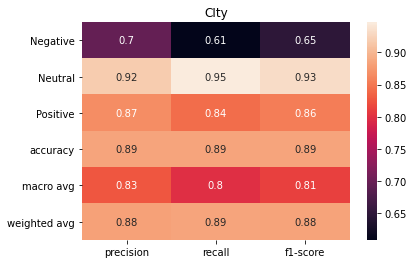

In [37]:
clf_report = classification_report(y_test, y_pred_clf_Bi,target_names=['Negative', 'Neutral', 'Positive'], output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.title("CIty")
print(clf_report['Negative']['precision'])

accuracy 0.9262680550890158
              precision    recall  f1-score   support

           0       0.80      0.68      0.74       550
           1       0.95      0.97      0.96      3697
           2       0.91      0.91      0.91      1707

    accuracy                           0.93      5954
   macro avg       0.89      0.85      0.87      5954
weighted avg       0.92      0.93      0.92      5954

Confusion Matrix 
 [[ 376   83   91]
 [  41 3585   71]
 [  54   99 1554]]
Confusion matrix, without normalization


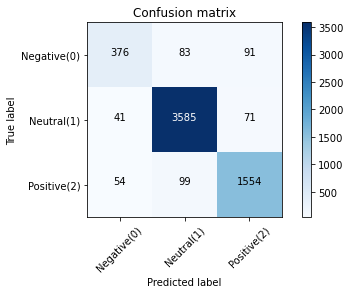

In [39]:
# Instantiate the Ensemble model for Bi gram Tf Idf 
classes = ['Negative(0)','Neutral(1)','Positive(2)']
estimators = [
    ('lr_clf', LogisticRegression(random_state=0)),
    ('nb_clf', MultinomialNB()),
    ('rf_clf', RandomForestClassifier(random_state=0)),
    ('mlp_clf',MLPClassifier(hidden_layer_sizes=(50, 75, 60, 30,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', 
                    learning_rate_init=0.001, power_t=0.5, max_iter=100, shuffle=True, random_state=None, tol=0.0001, verbose=True, 
                    warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, 
                    beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000))
]

# Stacking Classifier scikit-learn
stack_clf_Bi = StackingClassifier(estimators=estimators,final_estimator=RandomForestClassifier(random_state=0),
                               verbose=True, n_jobs=-1)
stack_clf_Bi.fit(train_feature_set_Bi, y_train)

stack_clf_pred_Bi = stack_clf_Bi.predict(test_feature_set_Bi)

stack_clf_acc_Bi = accuracy_score(stack_clf_pred_Bi, y_test)

print('accuracy %s' % stack_clf_acc_Bi)
print(classification_report(y_test, stack_clf_pred_Bi,target_names=my_categories))
print('Confusion Matrix \n',confusion_matrix(y_test,stack_clf_pred_Bi))


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, stack_clf_pred_Bi, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes
                      ,normalize= False,  title='Confusion matrix')

In [40]:
# Distribution of tags
print('Proportion of the classes in the data:')
print(df.target.value_counts() / len(df))

Proportion of the classes in the data:
neutral     0.622701
positive    0.284287
negative    0.093013
Name: target, dtype: float64


In [41]:
# Pie chart function
def city_wise(city):
    print(city, 'sentiemnt percentage pie chart')
    val = df[df['city'] == city]['target']
    myexplode = [0.2, 0, 0]
    fig = plt.figure()
    (val.value_counts() / len(val)).plot.pie(autopct='%1.1f%%', explode = myexplode, shadow = True)
    fig.set_facecolor('lightgrey')

In [97]:
# TEsting
df['city'] == 'Karachi'

0         True
1         True
2         True
3         True
4         True
         ...  
23809    False
23810    False
23811    False
23812    False
23813    False
Name: city, Length: 23814, dtype: bool

Karachi sentiemnt percentage pie chart


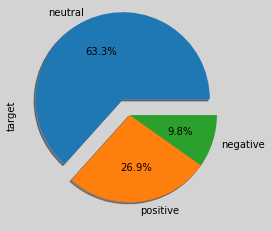

In [42]:
# Karachi pie chart
city_wise('Karachi') # pass city name to function

Lahore sentiemnt percentage pie chart


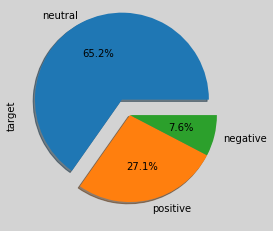

In [43]:
# Lahore Pie chart
city_wise('Lahore') # pass city name to function

In [44]:
# City tags distribution
cities = ['Karachi', 'Lahore',  'Hunza', 'Islamabad', 'Kaghan', 'Neelum Valley', 'Peshawar', 'Skardu', 'Swaat']

percentage = []
for city in cities:
    val = df[df['city'] == city]['target']
    percentage.append({city : dict((val.value_counts() / len(val)))})

percentage

[{'Karachi': {'neutral': 0.6334127456819535,
   'positive': 0.2686122692078618,
   'negative': 0.09797498511018464}},
 {'Lahore': {'neutral': 0.6524960998439937,
   'positive': 0.2710608424336973,
   'negative': 0.07644305772230889}},
 {'Hunza': {'neutral': 0.710691823899371,
   'positive': 0.2138364779874214,
   'negative': 0.07547169811320754}},
 {'Islamabad': {'neutral': 0.6506681210799018,
   'positive': 0.24406872102536134,
   'negative': 0.10526315789473684}},
 {'Kaghan': {'neutral': 0.5712121212121212,
   'positive': 0.36818181818181817,
   'negative': 0.06060606060606061}},
 {'Neelum Valley': {'neutral': 0.6313416009019166,
   'positive': 0.2502818489289741,
   'negative': 0.11837655016910936}},
 {'Peshawar': {'neutral': 0.6609211641706697,
   'positive': 0.24978807572760667,
   'negative': 0.08929076010172365}},
 {'Skardu': {'neutral': 0.5132743362831859,
   'positive': 0.45427728613569324,
   'negative': 0.032448377581120944}},
 {'Swaat': {'neutral': 0.5664670658682635,
   'p

In [45]:
# Positive tweets percentage per city
positive_tweet_percentage = [] 
for p in percentage:
    for city in p:
        positive_tweet_percentage.append((city,p[city]['positive']))

In [46]:
# Converting city positive percentage to dataframe
cities =  pd.DataFrame(positive_tweet_percentage, columns =['city', 'percentage'])
cities = cities.sort_values('percentage', ascending=False)
cities = cities.set_index('city')
cities

,percentage
city,
Skardu,0.454277
Kaghan,0.368182
Swaat,0.330240
Lahore,0.271061
Karachi,0.268612
Neelum Valley,0.250282
Peshawar,0.249788
Islamabad,0.244069
Hunza,0.213836


Text(0.5, 1.0, 'Best to worst city for visiting')

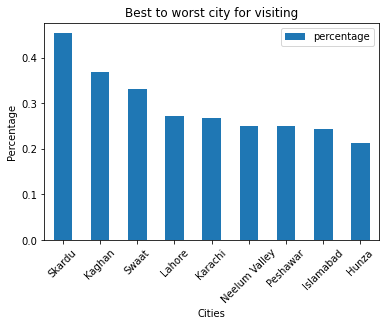

In [47]:
# Plotting bar graph for best city
cities.plot.bar()
plt.xticks(rotation=45, horizontalalignment="center")
plt.xlabel("Cities")
plt.ylabel("Percentage")
plt.title('Best to worst city for visiting')

In [ ]:
# Testing
Label_names = ['Negative', 'Neutral', 'Positive']

def classification_scores(pred, test, label = Label_names):
    acc = accuracy_score(pred, test)
    class_report = classification_report(test, pred, target_names=label, output_dict=True)
    conf_matrix = confusion_matrix(test, pred)
    dictionary = {"acc" : acc, "class_report" : class_report, "conf_matrix" : conf_matrix}
    return dictionary

def Plot_HeatMap(class_report, conf_matrix, accuracy, classifier_name, transformation_name, Label = Label_names):
    print(classifier_name + " with " + transformation_name + " Accuracy " + str(accuracy))
    plt.figure()
    sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True)
    plt.title(classifier_name + " with " + transformation_name + " Transormation Scores")
    plt.figure()
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=Label)
    disp.plot(xticks_rotation = 45, cmap = 'brg')
    plt.title(classifier_name + " with " + transformation_name + " Confusion Matrix")

# lr_Uni_acc = accuracy_score(y_pred_logreg_Uni, y_test)
# lr_Uni_class_report = classification_report(y_test, y_pred_logreg_Uni,target_names=Label_names, output_dict=True)
# lr_Uni_conf_matrix = confusion_matrix(y_test,y_pred_logreg_Uni)
lr_Uni = classification_scores(y_pred_logreg_Uni, y_test)
# print(lr_Uni['class_report']['Negative'])
# print(lr_Uni_acc)
# print(lr_Uni_class_report)
# print(lr_Uni_conf_matrix)
# print(lr_Uni_conf_matrix[0][1])
# print('accuracy %s' % lr_Uni_acc)
# print(classification_report(y_test, y_pred_logreg_Uni,target_names=my_categories))
# print('Confusion Matrix \n',lr_Uni_conf_matrix)
# print('Accuracy %s' % lr_Uni['acc'])
Plot_HeatMap(lr_Uni['class_report'], lr_Uni['conf_matrix'], lr_Uni['acc'], 'Logistic Regression', 'Uni-Gram TF-IDF Transormation')

nb_Uni_scores = classification_scores(y_pred_nb_Uni, y_test)
# print('accuracy %s' % nb_Uni_scores['acc'])
Plot_HeatMap(nb_Uni_scores['class_report'], nb_Uni_scores['conf_matrix'], nb_Uni_scores['acc'], 'Naive Bayes', 'Uni-Gram TF-IDF Transormation')


# nb1 = accuracy_score(y_pred_nb_Uni, y_test)
# print('accuracy %s' % nb1)
# print(classification_report(y_test, y_pred_nb_Uni,target_names=my_categories))
# print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_nb_Uni))

random_forest_Uni_scores = classification_scores(y_pred_rclf_Uni, y_test)
Plot_HeatMap(random_forest_Uni_scores['class_report'], random_forest_Uni_scores['conf_matrix'], random_forest_Uni_scores['acc'], 'Random Forest', 'Uni-Gram TF-IDF Transormation')

# print('accuracy %s' % accuracy_score(y_test,y_pred_rclf_Uni))
# print(classification_report(y_test, y_pred_rclf_Uni,target_names=my_categories))
# print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_rclf_Uni))

MLP_Uni_scores = classification_scores(y_pred_clf_Uni, y_test)
Plot_HeatMap(MLP_Uni_scores['class_report'], MLP_Uni_scores['conf_matrix'], MLP_Uni_scores['acc'], 'Multi-Layer Perceptron', 'Uni-Gram TF-IDF Transormation')

# mlp1= accuracy_score(y_pred_clf_Uni, y_test)
# print('accuracy %s' % mlp1)
# print(classification_report(y_test, y_pred_clf_Uni,target_names=my_categories))
# print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_clf_Uni))

lr_Bi_scores = classification_scores(y_pred_logreg_Bi, y_test)
Plot_HeatMap(lr_Bi_scores['class_report'], lr_Bi_scores['conf_matrix'], lr_Bi_scores['acc'], 'Logistic Regression', 'Bi-Gram TF-IDF Transforamtion')

# lrm1 = accuracy_score(y_pred_logreg_Bi, y_test)
# print('accuracy %s' % lrm1)
# print(classification_report(y_test, y_pred_logreg_Bi,target_names=my_categories))
# print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_logreg_Bi))

nb_Bi_scores = classification_scores(y_pred_nb_Bi, y_test)
Plot_HeatMap(nb_Bi_scores['class_report'], nb_Bi_scores['conf_matrix'], nb_Bi_scores['acc'], 'Naive Bayes', 'Bi-Gram TF-IDF Transforamtion')

# nb1 = accuracy_score(y_pred, y_pred_nb_Bi)
# print('accuracy %s' % nb1)
# print(classification_report(y_test, y_pred_nb_Bi,target_names=my_categories))
# print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_nb_Bi))

random_forest_Bi_scores = classification_scores(y_pred_rclf_Bi, y_test)
Plot_HeatMap(random_forest_Bi_scores['class_report'], random_forest_Bi_scores['conf_matrix'], random_forest_Bi_scores['acc'], 'Random Forest', 'Bi-Gram TF-IDF Transforamtion')

# print('accuracy %s' % accuracy_score(y_test,y_pred_rclf_Bi))
# print(classification_report(y_test, y_pred_rclf_Bi,target_names=my_categories))
# print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_rclf_Bi))

MLP_Bi_scores = classification_scores(y_pred_clf_Bi, y_test)
Plot_HeatMap(MLP_Bi_scores['class_report'], MLP_Bi_scores['conf_matrix'], MLP_Bi_scores['acc'], 'Multi_Layer Perceptron', 'Bi-Gram TF-IDF Transforamtion')

# mlp1= accuracy_score(y_pred_clf_Bi, y_test)
# print('accuracy %s' % mlp1)
# print(classification_report(y_test, y_pred_clf_Bi,target_names=my_categories))
# print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_clf_Bi))

# clf_report = classification_report(y_test, y_pred_clf_Bi,target_names=['Negative', 'Neutral', 'Positive'], output_dict=True)
# sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
# plt.title("CIty")
# print(clf_report['Negative']['precision'])

Logistic Regression with Uni-Gram TF-IDF Transormation Accuracy 0.8871346993617736
Naive Bayes with Uni-Gram TF-IDF Transormation Accuracy 0.8249916022841787
Random Forest with Uni-Gram TF-IDF Transormation Accuracy 0.9151830702049043
Multi-Layer Perceptron with Uni-Gram TF-IDF Transormation Accuracy 0.8993953644608667
Ensemble Model with Uni-Gram TF-IDF Transormation Accuracy 0.9390325831373866
Logistic Regression with Bi-Gram TF-IDF Transforamtion Accuracy 0.8789049378569029
Naive Bayes with Bi-Gram TF-IDF Transforamtion Accuracy 0.8113873026536782
Random Forest with Bi-Gram TF-IDF Transforamtion Accuracy 0.913503527040645
Multi_Layer Perceptron with Bi-Gram TF-IDF Transforamtion Accuracy 0.8859590191467921
Ensemble Model with Bi-Gram TF-IDF Transormation Accuracy 0.9262680550890158


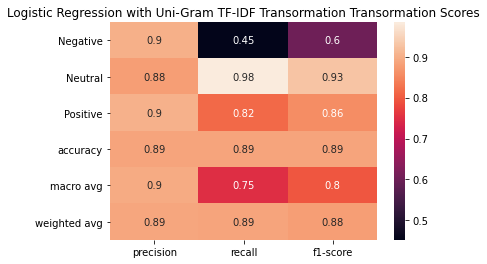

<Figure size 432x288 with 0 Axes>

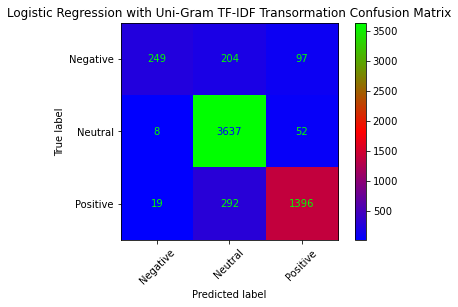

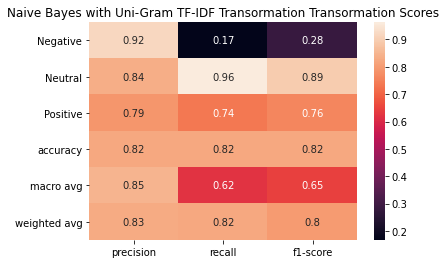

<Figure size 432x288 with 0 Axes>

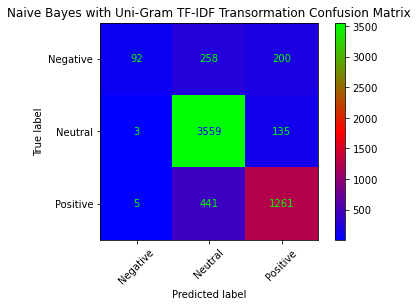

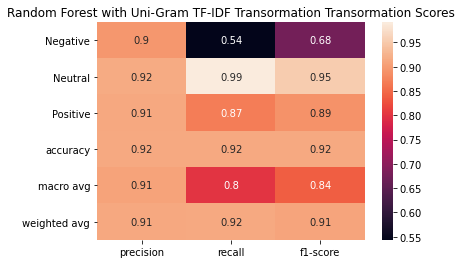

<Figure size 432x288 with 0 Axes>

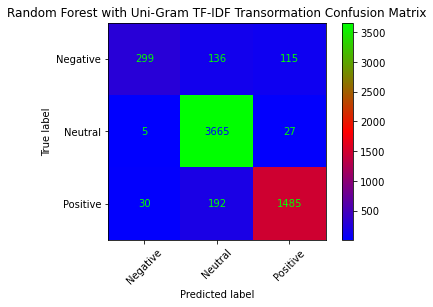

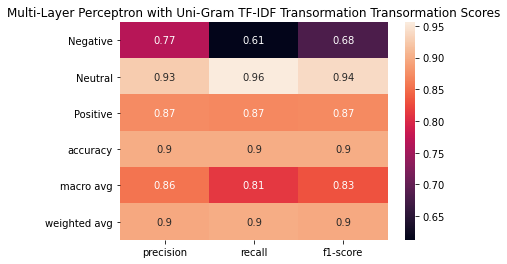

<Figure size 432x288 with 0 Axes>

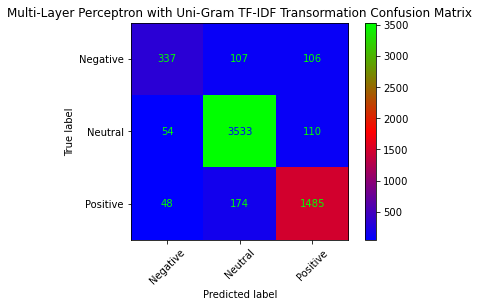

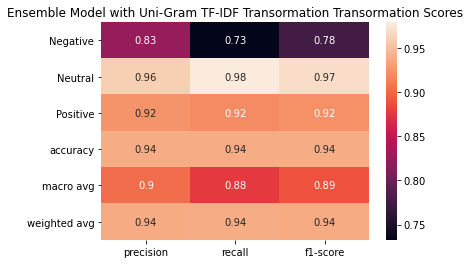

<Figure size 432x288 with 0 Axes>

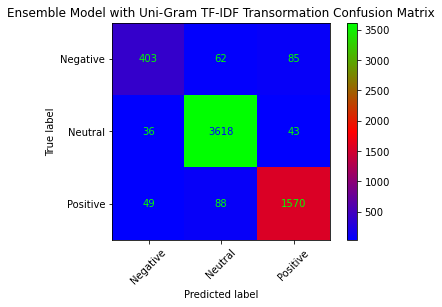

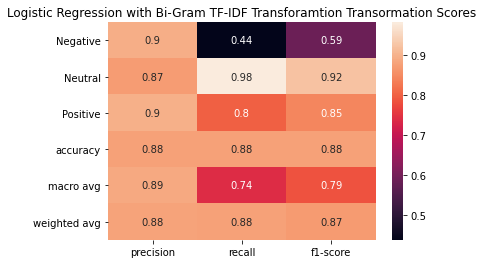

<Figure size 432x288 with 0 Axes>

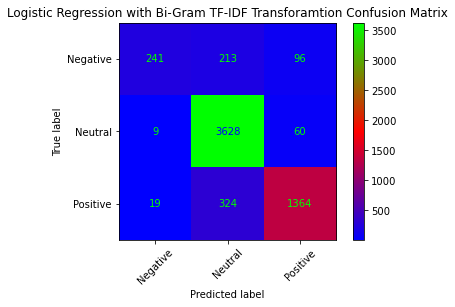

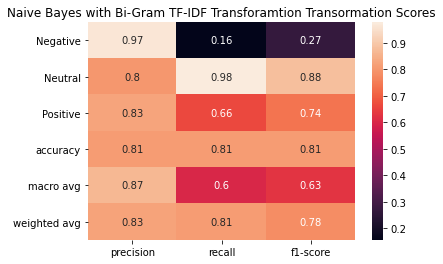

<Figure size 432x288 with 0 Axes>

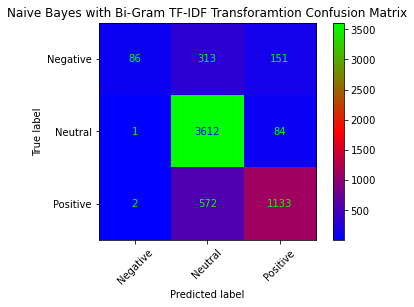

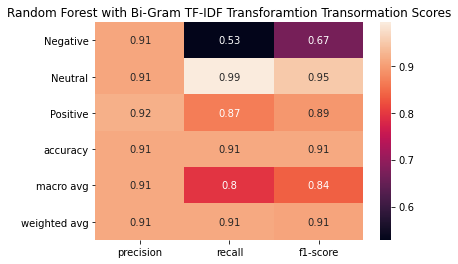

<Figure size 432x288 with 0 Axes>

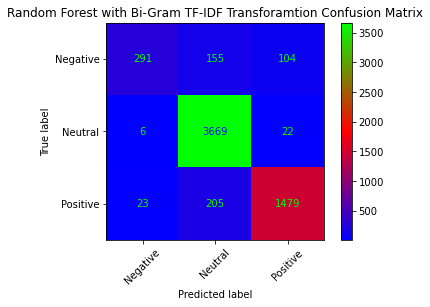

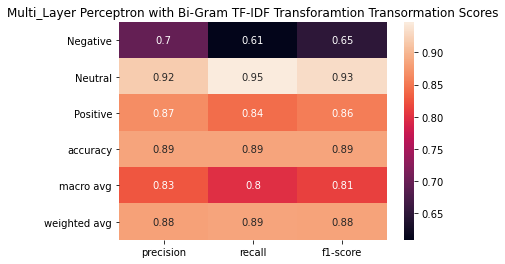

<Figure size 432x288 with 0 Axes>

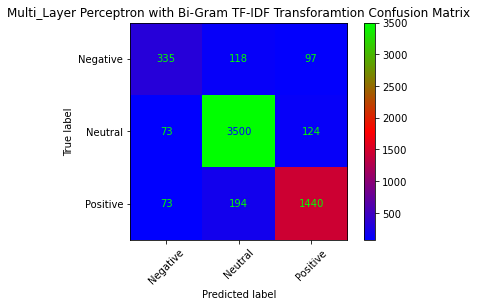

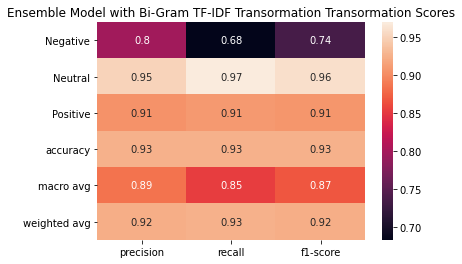

<Figure size 432x288 with 0 Axes>

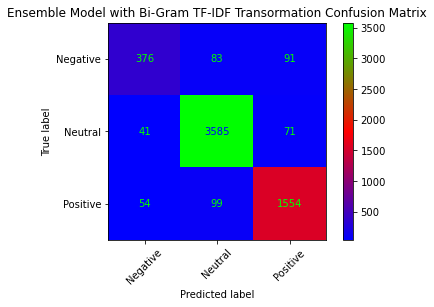

In [48]:
# Converting classification scores and confusion matrix to figures
Label_names = ['Negative', 'Neutral', 'Positive']

def classification_scores(pred, test, label = Label_names):
    acc = accuracy_score(pred, test)
    class_report = classification_report(test, pred, target_names=label, output_dict=True)
    conf_matrix = confusion_matrix(test, pred)
    dictionary = {"acc" : acc, "class_report" : class_report, "conf_matrix" : conf_matrix}
    return dictionary

def Plot_HeatMap(class_report, conf_matrix, accuracy, classifier_name, transformation_name, Label = Label_names):
    print(classifier_name + " with " + transformation_name + " Accuracy " + str(accuracy))
    plt.figure()
    sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True)
    plt.title(classifier_name + " with " + transformation_name + " Transormation Scores")
    plt.figure()
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=Label)
    disp.plot(xticks_rotation = 45, cmap = 'brg')
    plt.title(classifier_name + " with " + transformation_name + " Confusion Matrix")

    
    
    
lr_Uni = classification_scores(y_pred_logreg_Uni, y_test)
Plot_HeatMap(lr_Uni['class_report'], lr_Uni['conf_matrix'], lr_Uni['acc'], 'Logistic Regression', 'Uni-Gram TF-IDF Transormation')

nb_Uni_scores = classification_scores(y_pred_nb_Uni, y_test)
Plot_HeatMap(nb_Uni_scores['class_report'], nb_Uni_scores['conf_matrix'], nb_Uni_scores['acc'], 'Naive Bayes', 'Uni-Gram TF-IDF Transormation')

random_forest_Uni_scores = classification_scores(y_pred_rclf_Uni, y_test)
Plot_HeatMap(random_forest_Uni_scores['class_report'], random_forest_Uni_scores['conf_matrix'], random_forest_Uni_scores['acc'], 'Random Forest', 'Uni-Gram TF-IDF Transormation')

MLP_Uni_scores = classification_scores(y_pred_clf_Uni, y_test)
Plot_HeatMap(MLP_Uni_scores['class_report'], MLP_Uni_scores['conf_matrix'], MLP_Uni_scores['acc'], 'Multi-Layer Perceptron', 'Uni-Gram TF-IDF Transormation')

stack_clf_scores_Uni = classification_scores(stack_clf_pred_Uni, y_test)
Plot_HeatMap(stack_clf_scores_Uni['class_report'], stack_clf_scores_Uni['conf_matrix'], stack_clf_scores_Uni['acc'], 'Ensemble Model', 'Uni-Gram TF-IDF Transormation')

lr_Bi_scores = classification_scores(y_pred_logreg_Bi, y_test)
Plot_HeatMap(lr_Bi_scores['class_report'], lr_Bi_scores['conf_matrix'], lr_Bi_scores['acc'], 'Logistic Regression', 'Bi-Gram TF-IDF Transforamtion')

nb_Bi_scores = classification_scores(y_pred_nb_Bi, y_test)
Plot_HeatMap(nb_Bi_scores['class_report'], nb_Bi_scores['conf_matrix'], nb_Bi_scores['acc'], 'Naive Bayes', 'Bi-Gram TF-IDF Transforamtion')

random_forest_Bi_scores = classification_scores(y_pred_rclf_Bi, y_test)
Plot_HeatMap(random_forest_Bi_scores['class_report'], random_forest_Bi_scores['conf_matrix'], random_forest_Bi_scores['acc'], 'Random Forest', 'Bi-Gram TF-IDF Transforamtion')

MLP_Bi_scores = classification_scores(y_pred_clf_Bi, y_test)
Plot_HeatMap(MLP_Bi_scores['class_report'], MLP_Bi_scores['conf_matrix'], MLP_Bi_scores['acc'], 'Multi_Layer Perceptron', 'Bi-Gram TF-IDF Transforamtion')

stack_clf_scores_Bi = classification_scores(stack_clf_pred_Bi, y_test)
Plot_HeatMap(stack_clf_scores_Bi['class_report'], stack_clf_scores_Bi['conf_matrix'], stack_clf_scores_Bi['acc'], 'Ensemble Model', 'Bi-Gram TF-IDF Transormation')


In [51]:
# Displaying all the TF TP FP FN values Precsion scores and accuracies
all_classifier_scores = [lr_Uni, nb_Uni_scores, random_forest_Uni_scores, MLP_Uni_scores, stack_clf_scores_Uni, lr_Bi_scores, nb_Bi_scores, random_forest_Bi_scores, MLP_Bi_scores, stack_clf_scores_Bi]
index_name = ['Logistic Regression U', 'Naive Bayes U', 'Random Forest U', 'Multi-Layer Perceptron U', 'Ensemble U',
              'Logistic Regression B', 'Naive Bayes B', 'Random Forest B', 'Multi_Layer Perceptron B', 'Ensemble B']
conf_matrix_value_labels = ['TP', 'FP', 'FN', 'TN']
print("*"*100)

rval = 10

Accuracy_Data = pd.DataFrame((all_classifier_scores[i]['acc'] for i in range(rval)), index = index_name, columns = ['Accuracy'])
print(Accuracy_Data)
print("*"*100)

print("\nNegative Class Score")
Negative_Data_Scores = pd.DataFrame((all_classifier_scores[i]['class_report']['Negative'] for i in range(rval)), index = index_name)
print(Negative_Data_Scores)
print("*"*100)

print("\nPositive Class Score")
Positive_Data_Scores = pd.DataFrame((all_classifier_scores[i]['class_report']['Positive'] for i in range(rval)), index = index_name)
print(Positive_Data_Scores)
print("*"*100)

print("\nNeutral Class Score")
Neutral_Data_Scores = pd.DataFrame((all_classifier_scores[i]['class_report']['Neutral'] for i in range(rval)), index = index_name)
print(Neutral_Data_Scores)
print("\n")
print("*"*100)

def confusion_matrix_value_count(matrix):
    FP = matrix.sum(axis=0) - np.diag(matrix)
    FN = matrix.sum(axis=1) - np.diag(matrix)
    TP = np.diag(matrix)
    TN = matrix.sum() - (FP + FN + TP)
    dictionary = {"Negative" : [TP[0], FP[0], FN[0], TN[0]], "Neutral" : [TP[1], FP[1], FN[1], TN[1]], "Positive" : [TP[2], FP[2], FN[2], TN[2]]}
    return dictionary


print("\nPositive Class Values Count")
Positive_Class_Value_Count = pd.DataFrame((confusion_matrix_value_count(all_classifier_scores[i]['conf_matrix'])['Positive'] for i in range(rval)), index = index_name, columns = conf_matrix_value_labels)
print(Positive_Class_Value_Count)
print("*"*100)

print("\nNegative Class Values Count")
Negative_Class_Value_Count = pd.DataFrame((confusion_matrix_value_count(all_classifier_scores[i]['conf_matrix'])['Negative'] for i in range(rval)), index = index_name, columns = conf_matrix_value_labels)
print(Negative_Class_Value_Count)
print("*"*100)

print("\nNeutral Class Values Count")
Neutral_Class_Value_Count = pd.DataFrame((confusion_matrix_value_count(all_classifier_scores[i]['conf_matrix'])['Neutral'] for i in range(rval)), index = index_name, columns = conf_matrix_value_labels)
print(Neutral_Class_Value_Count)
print("*"*100)
# FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
# FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
# TP = np.diag(confusion_matrix)
# TN = confusion_matrix.values.sum() - (FP + FN + TP)

****************************************************************************************************
                          Accuracy
Logistic Regression U     0.887135
Naive Bayes U             0.824992
Random Forest U           0.915183
Multi-Layer Perceptron U  0.899395
Ensemble U                0.939033
Logistic Regression B     0.878905
Naive Bayes B             0.811387
Random Forest B           0.913504
Multi_Layer Perceptron B  0.885959
Ensemble B                0.926268
****************************************************************************************************

Negative Class Score
                          precision    recall  f1-score  support
Logistic Regression U      0.902174  0.452727  0.602906      550
Naive Bayes U              0.920000  0.167273  0.283077      550
Random Forest U            0.895210  0.543636  0.676471      550
Multi-Layer Perceptron U   0.767654  0.612727  0.681496      550
Ensemble U                 0.825820  0.732727  0.776493      550
L